/home/muhammad.huzaifa/.conda/envs/deit/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
600it [04:50,  2.06it/s]


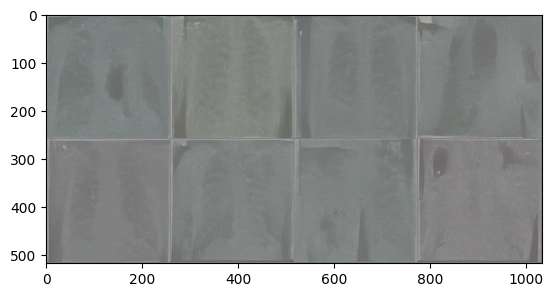

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader
import os
from data.dataset import data_loader


device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
def test():
    image_pipe = DDPMPipeline.from_pretrained("saved_model_scratch/my-model_92")
    image_pipe.to(device);
    scheduler = DDIMScheduler.from_pretrained("saved_model_scratch/my-model_92/scheduler")
    scheduler.set_timesteps(num_inference_steps=600)
    x = torch.randn(8, 3, 256, 256).to(device)  # Batch of 8
    for i, t in tqdm(enumerate(scheduler.timesteps)):
        model_input = scheduler.scale_model_input(x, t)
        with torch.no_grad():
            noise_pred = image_pipe.unet(model_input, t)["sample"]
        x = scheduler.step(noise_pred, t, x).prev_sample

    return x


x = test()
grid = torchvision.utils.make_grid(x, nrow=4)
plt.imshow(grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5);
